Imports

In [1]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats
from statsmodels.stats import proportion
import seaborn as sns
import matplotlib.pyplot as plt

loading both datasets

In [2]:
df1 = pd.read_csv("../Datasets/dataset1.csv")
df2 = pd.read_csv("../Datasets/dataset2.csv")

Data Cleaning / Preparation



In [3]:
print(df1.head())


         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0  
2  30/12/2017 

In [4]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
None


In [5]:
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB
None


In [6]:
print(df2.head())


               time  month  hours_after_sunset  bat_landing_number  \
0  26/12/2017 16:13      0                -0.5                  20   
1  26/12/2017 16:43      0                 0.0                  28   
2  26/12/2017 17:13      0                 0.5                  25   
3  26/12/2017 17:43      0                 1.0                  71   
4  26/12/2017 18:13      0                 1.5                  44   

   food_availability  rat_minutes  rat_arrival_number  
0           4.000000          0.0                   0  
1           4.000000          0.0                   0  
2           4.000000          0.0                   0  
3           4.000000          0.0                   0  
4           3.753857          0.0                   0  


In [7]:
print("Null values in dataset1:\n", df1.isnull().sum())
print("Null values in dataset2:\n", df2.isnull().sum())

Null values in dataset1:
 start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64
Null values in dataset2:
 time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64


In [8]:
df1 = df1.dropna()
df2 = df2.dropna()

In [9]:
# Ensure numeric columns are floats
numeric_cols1 = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset', 'risk', 'reward']
df1[numeric_cols1] = df1[numeric_cols1].astype(float)

numeric_cols2 = ['hours_after_sunset', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']
df2[numeric_cols2] = df2[numeric_cols2].astype(float)



Count risk-taking vs avoidance:


In [10]:
risk_counts = df1['risk'].value_counts()
print(risk_counts)

risk
1.0    449
0.0    417
Name: count, dtype: int64


Proportion of avoidance:

In [11]:
avoidance_rate = (df1['risk'] == 0).mean()
print("Avoidance rate:", avoidance_rate)

Avoidance rate: 0.4815242494226328


Rewards:

In [12]:
reward_rate = (df1['reward'] == 1).mean()
print("Reward rate:", reward_rate)

Reward rate: 0.558891454965358


Average delay before food (bat_landing_to_food):

In [13]:
print("Mean landing-to-food time:", df1['bat_landing_to_food'].mean())
print("Median landing-to-food time:", statistics.median(df1['bat_landing_to_food']))

Mean landing-to-food time: 11.860369096964202
Median landing-to-food time: 4.0


Average rat arrivals per 30 mins:

In [14]:
print("Mean rat arrivals:", df2['rat_arrival_number'].mean())

Mean rat arrivals: 0.44465379180405085


Relationship between rat presence and bat landings:

In [15]:
pd.crosstab(df1['risk'], df1['reward'])

reward,0.0,1.0
risk,,
0.0,31,386
1.0,351,98


Proportion Test – Do bats avoid more than take risks?

In [16]:
corr = df2['rat_minutes'].corr(df2['bat_landing_number'])
print("Correlation between rat_minutes and bat_landing_number:", corr)

Correlation between rat_minutes and bat_landing_number: -0.14622750084478836


One-sample t-test – Is mean delay > 0 (do bats hesitate when rats around)

In [17]:
count_risk = (df1['risk'] == 1).sum()
n = len(df1)
ci_low, ci_high = proportion.proportion_confint(count_risk, n, alpha=0.05, method='normal')
print("Proportion risk-taking 95% CI:", ci_low, ci_high)

Proportion risk-taking 95% CI: 0.48519734954993826 0.5517541516047961


 Two-sample t-test – Compare delay when risk-taking vs avoidance

In [18]:
t_stat, p_val = stats.ttest_1samp(df1['bat_landing_to_food'], 0)
print("T-test for hesitation:", t_stat, p_val)

T-test for hesitation: 12.566213678038126 2.1935596926930074e-33


Correlation Test – Rats vs Bats



In [19]:
delay_risk = df1[df1['risk'] == 1]['bat_landing_to_food']
delay_avoid = df1[df1['risk'] == 0]['bat_landing_to_food']

t_stat, p_val = stats.ttest_ind(delay_risk, delay_avoid, equal_var=False)
print("T-test delay (risk vs avoid):", t_stat, p_val)

T-test delay (risk vs avoid): 5.1398138838144325 3.5096048166276354e-07


In [20]:
corr, p_val = stats.pearsonr(df2['rat_minutes'], df2['bat_landing_number'])
print("Pearson correlation:", corr, "p-value:", p_val)

Pearson correlation: -0.14622750084478847 p-value: 1.2875253590004781e-11




Visualization



Bat Risk vs Avoidance

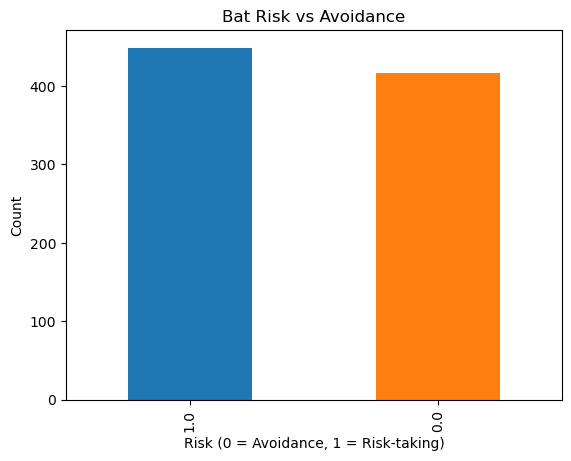

In [21]:
import matplotlib.pyplot as plt

# Risk vs Avoidance (bar chart)
df1['risk'].value_counts().plot(
    kind='bar',
    title="Bat Risk vs Avoidance",
    color=['#1f77b4', '#ff7f0e']   # Blue for avoidance, Orange for risk-taking
)
plt.xlabel("Risk (0 = Avoidance, 1 = Risk-taking)")
plt.ylabel("Count")
plt.show()

Correlation between Rat and Bat Activity Overtime

Correlation between rat arrival number and bat landing number: -0.074



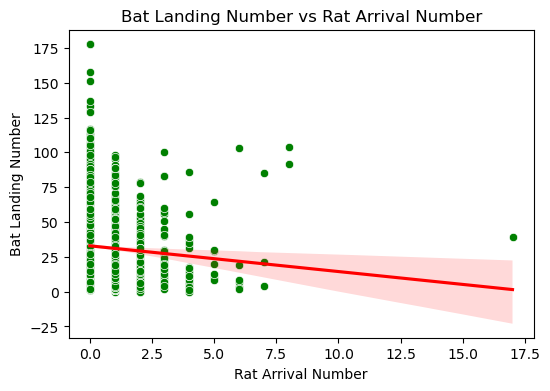

In [22]:
# Calculate correlation
rat_arrivals = df2["rat_arrival_number"]
bat_landings = df2["bat_landing_number"]
correlation = rat_arrivals.corr(bat_landings, method="pearson")

print(f"Correlation between rat arrival number and bat landing number: {correlation:.3f}")
print()

# Scatter plot with trend line
plt.figure(figsize=(6, 4))
sns.scatterplot(x="rat_arrival_number", y="bat_landing_number", data=df2, color="green")
sns.regplot(x="rat_arrival_number", y="bat_landing_number", data=df2, scatter=False, color="red")
plt.title("Bat Landing Number vs Rat Arrival Number")
plt.xlabel("Rat Arrival Number")
plt.ylabel("Bat Landing Number")
plt.show()

Reward outcome by Risk behaviour

Reward vs Risk:
 reward  0.0  1.0
risk            
0.0      31  386
1.0     351   98


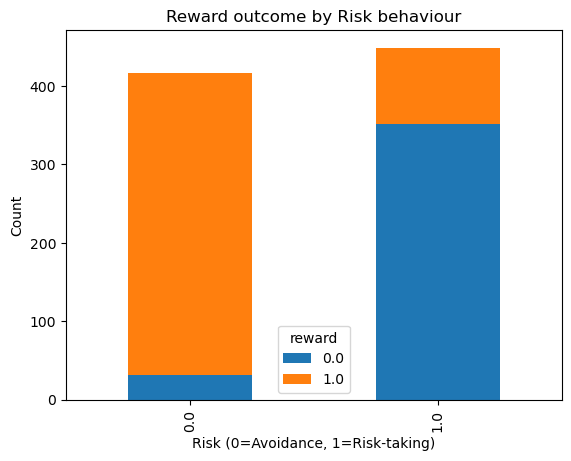

In [23]:
# Reward vs Risk
reward_risk = pd.crosstab(df1['risk'], df1['reward'])
print("Reward vs Risk:\n", reward_risk)

reward_risk.plot(kind="bar", stacked=True, title="Reward outcome by Risk behaviour")
plt.xlabel("Risk (0=Avoidance, 1=Risk-taking)")
plt.ylabel("Count")
plt.show()